<a href="https://colab.research.google.com/github/salvager2019/2020-WebScrapy/blob/master/Deep_Learning_for_Coders_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.6MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 194kB 18.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.1MB 20.4MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 2.6MB 39.6MB/s 
Mounted at /content/gdrive


4/1AfDhmrjhUOm-qopHiKn4iaOf2kV3X718Vov0VHZZrGE8KF419OVBhEPN0Zo

In [ ]:
from fastbook import *
from fastai.vision.all import *
from fastai.text.all import * 
from fastai.tabular.all import *
from fastai.collab import *
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.172716,0.030437,0.010149,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.053560,0.015483,0.005413,00:57


1.一组处理单元

2.一个激活的状态

3.每个单元的输出功能

4.甲连通的图案单元之间

5.甲传播规则用于通过连通性的网络中传播的活动模式

6.一个激活规则，用于组合输入冲击在单元上与该单元的当前状态以产生输出的单元

7.一种学习规则，可根据经验修改连接模式

8.系统必须在其中运行的环境

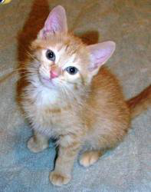

In [ ]:
img=PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader=widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img=PILImage.create(uploader.data[0])
is_cat,_,probs=learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


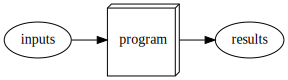

In [ ]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=1]
inputs->program->results''')

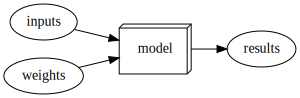

In [ ]:
#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

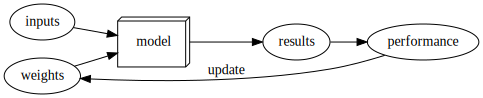

In [ ]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

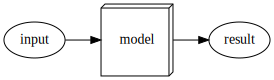

In [ ]:
gv('''model[shape=box3d width=1 height=1]
input->model->result''')

**Samuel:我们不需要深入研究此类程序，就可以看到它可以完全自动化，并且可以看到这样编程的机器可以从其经验中“学习”。**

**我们的输入是图像。我们的权重是神经网络中的权重。我们的模型是神经网络。我们的结果是由神经网络计算的值，例如“狗”或“猫”。**


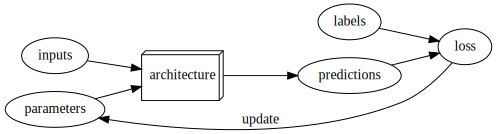

In [ ]:
#hide_input
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7  label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

模型的功能形式称为其体系结构（但要小心-有时人们将模型用作体系结构的代名词，因此可能会造成混淆）。

该权重被称为参数。

该预测是从所计算出的自变量，它是数据不包括标签。

该模型的结果称为预测。

绩效的衡量标准称为损失。

损失不仅取决于预测，而且取决于正确的标签（也称为目标或因变量）；例如“狗”或“猫”。

没有数据就无法创建模型。

模型只能学习对用于训练模型的输入数据中看到的模式进行操作。

这种学习方法只能创建预测，而不是建议的操作。

仅提供输入数据示例是不够的。我们也需要为该数据添加标签（例如，狗和猫的图片不足以训练模型；我们需要为每个图片加上标签，说明哪些是狗，哪些是猫）。

一般而言，我们已经看到大多数组织说他们没有足够的数据，实际上意味着他们没有足够的标签数据。如果任何组织有兴趣在实践中对模型做一些事情，那么大概他们有一些计划要对模型进行操作的输入。大概他们已经做了一段时间（例如，手动或使用某种启发式程序），所以他们从这些过程中获得了数据！例如，放射科几乎可以肯定会拥有医学扫描的存档（因为他们需要能够检查其患者随着时间的进展），但是这些扫描可能没有包含诊断或干预措施列表的结构化标签（因为放射科医生通常会创建自由文本的自然语言报告，而不是结构化数据。在本书中，我们将大量讨论标记方法，因为在实践中这是一个非常重要的问题。

In [ ]:
path=untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x):return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

#path 图片路径 valid_pct保留多少的数据不用来训练 label_func第一个字母大写是猫 item_tfms调整224像素正方形该
#参数每次运行此代码时都会seed=42将随机种子设置为相同的值，这意味着我们每次运行时都将获得相同的验证集

分类和回归：分类和回归在机器学习中具有非常特殊的含义。这是我们将在本书中研究的两种主要类型的模型。分类模型是试图预测类别或类别的模型。也就是说，它是根据许多离散的可能性进行预测的，例如“狗”或“猫”。回归模型是一种试图预测一个或多个数字量（例如温度或位置）的模型。有时人们用回归一词来指一种称为线性回归模型的特殊模型; 这是一种不好的做法，在本书中我们不会使用该术语！

即使您的模型没有完全记住您的所有数据，在训练的早期，它也可能已经记住了其中的某些部分。因此，您训练的时间越长，训练集上的准确性就越高；验证集的准确性也会在一段时间内有所改善，但最终会因为模型开始存储训练集而不是在数据中找到可概括的基础模式而变得越来越差。发生这种情况时，我们说该模型过度拟合。

要点：验证集：训练模型时，必须始终同时具有训练集和验证集，并且必须仅在验证集上测量模型的准确性。如果训练时间太长，没有足够的数据，您会发现模型的准确性开始变差；这称为过拟合。fastai默认valid_pct为0.2，因此即使您忘记了，fastai也会为您创建一个验证集！

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=error_rate,pretrained=True)

什么是指标？度量标准是一种使用验证集测量模型预测质量的功能，该度量标准将在每个时期的末尾打印。在这种情况下，我们使用error_rate，这是fastai提供的功能，它的功能恰如其分：告诉您验证集中图像分类的百分比不正确。另一个常见的分类指标是accuracy（1.0 - error_rate）

cnn_learner还有一个参数pretrained，默认为True（因此，即使我们未指定，也使用这种情况），该参数将模型中的权重设置为专家已经训练的值，可以识别1.3的一千个不同类别百万张照片（使用著名的ImageNet数据集）。权重已在其他一些数据集上进行训练的模型称为预训练模型。您几乎应该始终使用经过预训练的模型，因为这意味着在甚至没有显示任何数据之前，您的模型已经非常有能力。而且，正如您将看到的，在深度学习模型中，几乎不需要考虑项目的详细信息，这些功能中的许多都是您所需要的。例如，预训练模型的某些部分将处理边缘，渐变和颜色检测，这是许多任务所需的。

使用预先训练的模型时，cnn_learner将删除最后一层，因为它始终是为原始训练任务（即ImageNet数据集分类）专门定制的，并用一个或多个具有随机权重的新层替换它，该层的大小适合于数据集您正在与。模型的最后一部分称为头部。

In [ ]:
learn.fine_tune(1)

当您使用该fine_tune方法时，fastai将为您使用这些技巧。您可以设置一些参数（我们将在后面讨论），但是在这里显示的默认形式中，它执行两个步骤：

使用一个时期来拟合模型的那些部分，以使新的随机头正确使用您的数据集。
调用该方法以适合整个模型时，使用请求的时期数，以较早的层（如我们所见，通常不需要太多更改）更新较新的层（尤其是头部）的权重预训练的重量）。
模型的头是新添加的特定于新数据集的部分。一个时代是一个完整的遍历数据集。调用之后fit，将打印每个历元之后的结果，显示历元编号，训练和验证设置损失（用于训练模型的“性能指标”）以及您要求的所有指标（在这种情况下，错误率）。

机器学习是一门学科，我们不是通过完全自己编写程序而是通过从数据中学习来定义程序。深度学习是使用机器学习中的特殊神经网络与多个层。图像分类是一个代表示例（也称为图像识别）。我们从标记数据开始；也就是说，在一组图像中，我们为每个图像分配了一个标签，以指示其代表的含义。我们的目标是产生一个称为模型的程序，给定新图像，该程序将对新图像表示的内容做出准确的预测。

In [ ]:
path=untar_data(URLs.CAMVID_TINY)

In [ ]:
dls=SegmentationDataLoaders.from_label_func(
    path,bs=8,fnames=get_image_files(path/"images"),
    label_func=lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt',dtype=str))
learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.045744,2.449287,00:01


epoch,train_loss,valid_loss,time
0,1.891791,1.688700,00:01
1,1.623062,1.312945,00:01
2,1.462267,1.481597,00:01
3,1.368416,1.087527,00:01
4,1.232871,0.914746,00:01
5,1.108228,0.834705,00:01
6,1.007175,0.816451,00:01
7,0.929173,0.806691,00:01


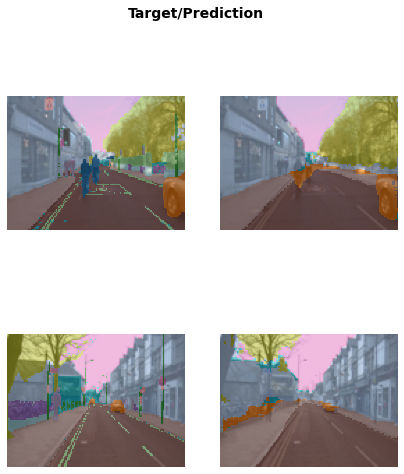

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
dls=TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=.5,metrics=accuracy)
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.596657,0.385665,0.828120,03:51


epoch,train_loss,valid_loss,accuracy,time
0,0.330876,0.247395,0.901920,07:27
1,0.255820,0.201986,0.921560,07:28
2,0.203127,0.188513,0.926520,07:27
3,0.159846,0.185054,0.929640,07:26


In [ ]:
learn.predict("I really liked that movie!")

In [ ]:
path=untar_data(URLs.ADULT_SAMPLE)
dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names='salary',
  cat_names=['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
  cont_names = ['age', 'fnlwgt', 'education-num'],
  procs=[Categorify,FillMissing,Normalize])
learning=tabular_learner(dls,metrics=accuracy)

In [ ]:
learning.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.363076,0.361806,0.829699,00:05
1,0.344735,0.348351,0.832310,00:05
2,0.345268,0.344028,0.836763,00:05


In [ ]:
path=untar_data(URLs.ML_SAMPLE)
dls=CollabDataLoaders.from_csv(path/'ratings.csv')
learning=collab_learner(dls,y_range=(.5,5.5))
learning.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.503007,1.424446,00:00


epoch,train_loss,valid_loss,time
0,1.365788,1.365033,00:00
1,1.261084,1.184179,00:00
2,1.029226,0.874008,00:00
3,0.801825,0.733602,00:00
4,0.696902,0.697227,00:00
5,0.647775,0.687803,00:00
6,0.627957,0.680831,00:00
7,0.619168,0.678815,00:00
8,0.610262,0.677725,00:00
9,0.604092,0.677614,00:00


In [ ]:
learning.show_results()

,userId,movieId,rating,rating_pred
0,30.0,7.0,5.0,4.369016
1,3.0,17.0,3.0,3.341245
2,37.0,59.0,4.0,4.054746
3,94.0,72.0,3.5,3.383288
4,94.0,98.0,4.0,4.104456
5,90.0,95.0,4.5,4.234324
6,29.0,65.0,4.0,3.814268
7,69.0,95.0,5.0,4.247777
8,7.0,92.0,5.0,4.123204


正如我们所讨论的，模型的目标是对数据进行预测。但是模型训练过程从根本上来说是愚蠢的。如果我们使用所有数据训练一个模型，然后使用相同的数据评估该模型，那么我们将无法判断我们的模型在未看到的数据上的表现如何。如果没有这些非常有价值的信息来指导我们训练模型，则很有可能会擅长对数据进行预测，但对新数据的效果会很差。


为了避免这种情况，我们的第一步是将数据集分为两组：训练集（模型在训练中看到）和验证集（也称为开发集）（仅用于评估）。这使我们能够测试模型是否从训练数据中汲取了教训，这些训练数据可以推广到新数据（验证数据）。


理解这种情况的一种方法是，从某种意义上说，我们不希望我们的模型通过“作弊”获得良好的结果。如果它对数据项做出准确的预测，那应该是因为它已经了解了该项目的特性，而不是因为模型实际上是通过查看该特定项目而形成的。


拆分我们的验证数据意味着我们的模型在训练中永远不会看到它，因此完全不受它的污染，也不会以任何方式作弊。

一个验证集和一个测试集